<a href="https://colab.research.google.com/github/LeeGitaek/2020_AI_Class/blob/master/mnist_softmax_SGD_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision.datasets as data 
import torchvision.transforms as transforms
import random 

In [0]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
random.seed(777)
#난수생성 규칙 설정 seed
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [0]:
#학습 파라미터 설정
# tpu = 구글에서 만든 gpu

learning_rate = 0.001
training_epochs = 15
batch_size = 100
#모의 문제 해결 수 

In [6]:
mnist_train = data.MNIST(root = 'MNIST_data/',
                         train=True,
                         transform = transforms.ToTensor(),
                         download = True)
# root 값은 어디에 저장할 것인가 


mnist_test = data.MNIST(root='MNIST_data/',
                        train=False,
                        transform = transforms.ToTensor(),
                        download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle=True,
                                          drop_last = True)
#shuffle = 데이터 섞어줌
#

In [0]:
linear = torch.nn.Linear(784,10,bias=True)
#출력 10개의 클래스 

In [9]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [0]:
model = torch.nn.Sequential(linear).to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate) #0.49

In [13]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X,Y in data_loader:
      # (100,1,28,28) 크기의 텐서를 (100,784) 크기의 텐서로 변형 
       X = X.view(-1,28*28).to(device) #reshape과 유사
       # one - hot 인코딩 되어있지 않음 
       Y = Y.to(device)

       # 그레디언트 초기화
       optimizer.zero_grad()
       hypothesis = model(X)

       cost = loss(hypothesis,Y) 
       cost.backward()
       optimizer.step()

       avg_cost += cost/total_batch
    print('Epoch :','%04d' % (epoch+1),'cost=','{:.9f}'.format(avg_cost))
print('Learning finished..!')      

Epoch : 0001 cost= 8.834757805
Epoch : 0002 cost= 7.992955685
Epoch : 0003 cost= 7.299260139
Epoch : 0004 cost= 6.721499443
Epoch : 0005 cost= 6.227321625
Epoch : 0006 cost= 5.794909000
Epoch : 0007 cost= 5.411984444
Epoch : 0008 cost= 5.071072102
Epoch : 0009 cost= 4.766777515
Epoch : 0010 cost= 4.494760513
Epoch : 0011 cost= 4.251229286
Epoch : 0012 cost= 4.032783031
Epoch : 0013 cost= 3.836215734
Epoch : 0014 cost= 3.658822536
Epoch : 0015 cost= 3.498202801
Learning finished..!


In [14]:
with torch.no_grad():
    # float() : GPU => CPU 로 데이터 내리기
    X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction , 1 ) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:',accuracy.item())
    

Accuracy: 0.4811999797821045


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [15]:
r = random.randint(0,len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print('Label:',Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction :',torch.argmax(single_prediction,1).item())


Label: 8
Prediction : 7


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([8], device='cuda:0')


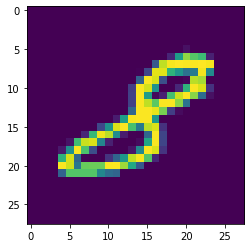

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)